<a href="https://colab.research.google.com/github/Maisho20/PCVK_Sabbaha-Naufal-Erwanda/blob/main/Pertemuan%2010/Week_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nama: Sabbaha Naufal Erwanda**

**Kelas: TI-3A**

**NIM: 2141720221**

# Praktikum 10 - GLOBAL THRESHOLDING

In [1]:
# connect google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Import beberapa library**

In [2]:
!pip install pytesseract

In [3]:
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

## **1. Membuat Global Threshold**

In [4]:
img_or = cv2.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/img/gradient.jpg', 0)
img = cv2.medianBlur(img_or,5)
gray = img
# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


ret, thresh1 = cv2.threshold(img, 170, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(img, 170, 255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(img, 170, 255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(img, 170, 255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(img, 170, 255, cv2.THRESH_TOZERO_INV)

In [5]:
titles = ['Citra Asli', 'Binary','Binary INV', 'Turnc', 'Tozero', 'Tozero INV']
citra2 = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

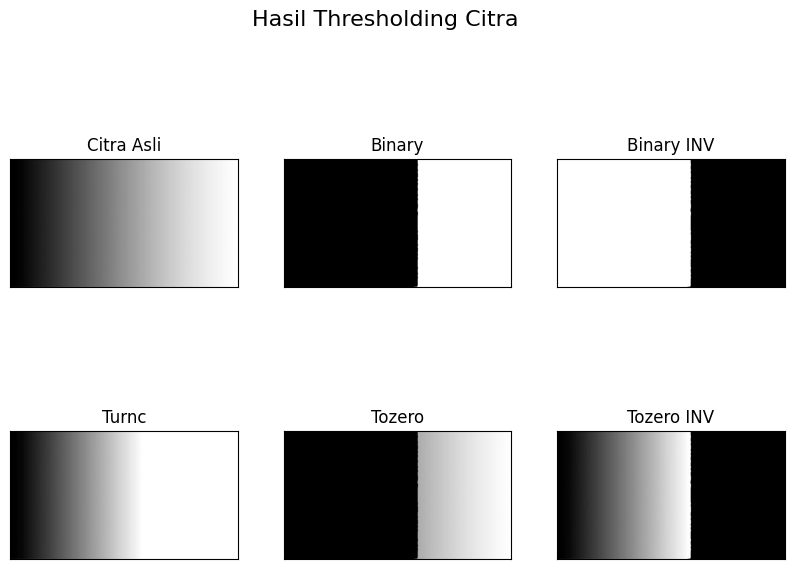

In [6]:
plt.figure(figsize = (10,10))
for i in range(len(citra2)):
  plt.subplot(3,3,i+1),plt.imshow(citra2[i],'gray')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])

plt.suptitle('Hasil Thresholding Citra', fontsize=16)
plt.show()

## **4. Buat Otsu Thresholding tanpa menggunakan Library**

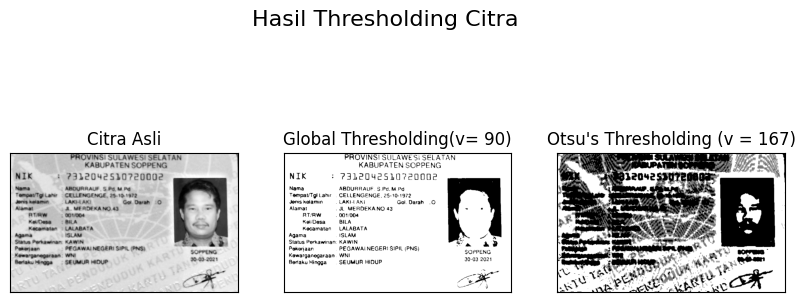

In [21]:
img_or = cv2.imread('/content/drive/MyDrive/Colab Notebooks/PCVK/img/KTP.jpeg', 0)
img = cv2.medianBlur(img_or,5)
gray = img
# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#Global Thresholding
ret1,th1 = cv2.threshold(img_or,90,255,cv2.THRESH_BINARY)

# kalkulasi histogram
hist, bins = np.histogram(img_or.ravel(), 256, [0, 256])

# Calculate the cumulative sum of the histogram
cumsum = hist.cumsum()

# Normalize the cumulative sum to the range [0, 1]
cumsum_norm = cumsum / cumsum.max()

# membuat threshold Otsu
threshold = np.argmax(cumsum_norm >= 0.5)

# Apply Otsu thresholding
ret, thresh = cv2.threshold(img, threshold, 255, cv2.THRESH_BINARY)

# Visualisasi
titles = ['Citra Asli', 'Global Thresholding(v= 90)',"Otsu's Thresholding (v = 167)"]
citra2 = [img, th1, thresh]

plt.figure(figsize = (10,10))
for i in range(len(citra2)):
  plt.subplot(3,3,i+1),plt.imshow(citra2[i],'gray')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])

plt.suptitle('Hasil Thresholding Citra', fontsize=16)
plt.show()

## **5. Histogram dari Citra Tersegmentasi (Histogram Foreground saja)**

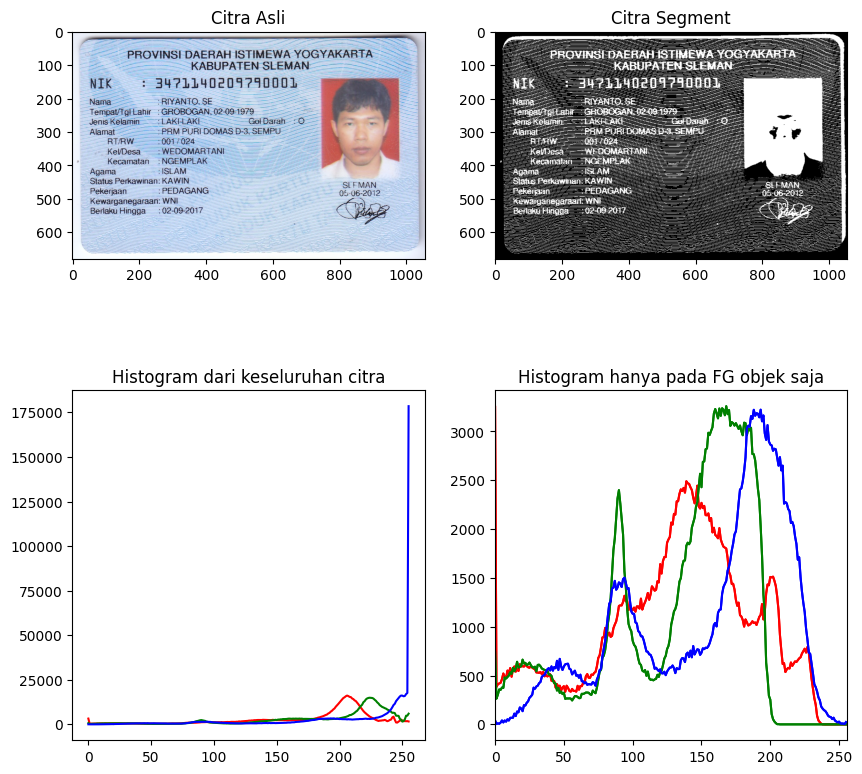

In [22]:
ktp = ('/content/drive/MyDrive/Colab Notebooks/PCVK/img/KTP/ktp.png')
img_l = cv2.imread(ktp)
img_rgb = cv2.cvtColor(img_l,cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img_rgb,cv2.COLOR_BGR2GRAY)

ret3,mask = cv2.threshold(img_gray,200,255,cv2.THRESH_BINARY_INV)

plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.imshow(img_rgb)
plt.title('Citra Asli')
plt.subplot(2,2,2),plt.imshow(mask, 'gray')
plt.title('Citra Segment')
color = ('r','g','b')

for i,col in enumerate(color):
    hist0 = cv2.calcHist([img_rgb],[i],None,[256],[0,256])
    plt.subplot(2,2,3),plt.plot(hist0,color = col)
    plt.title('Histogram dari keseluruhan citra')
    hist1 = cv2.calcHist([img_rgb],[i],mask,[256],[0,256])
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram dari keseluruhan citra')
    hist1 = cv2.calcHist([img_rgb],[i],mask,[256],[0,256])
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram hanya pada FG objek saja')
    plt.xlim([0,256])

plt.show()

## **6. Segmentasi Warna pada image 'ktp_riyanto.png'. Munculkan warna biru saja. (K-Means)**

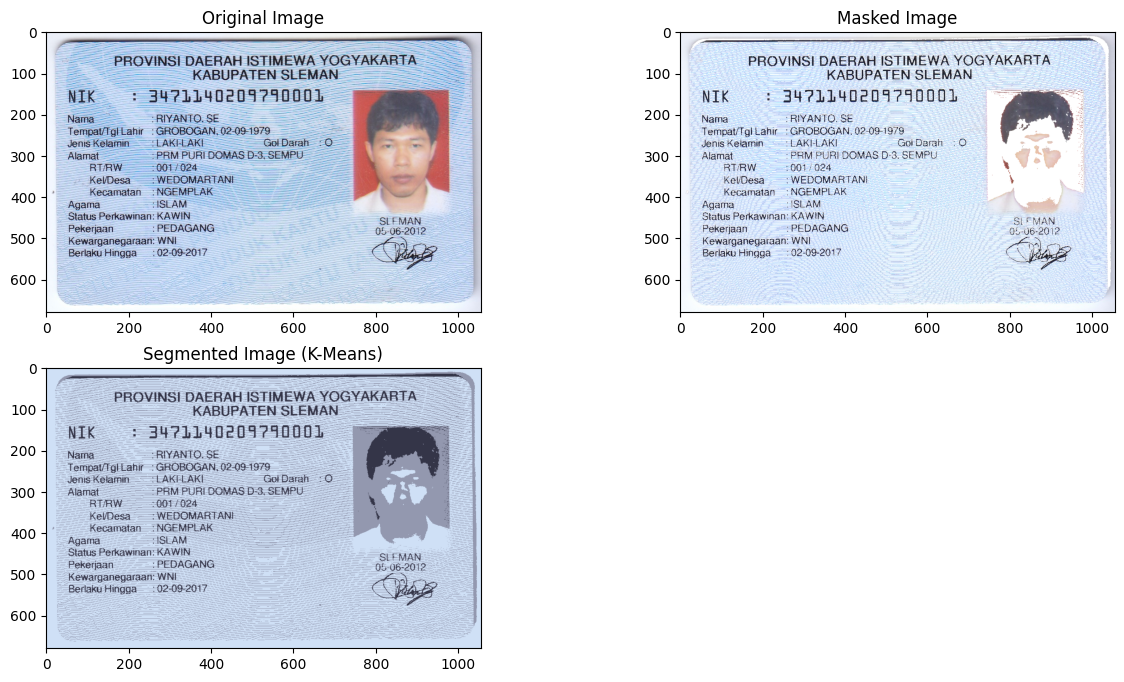

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
ktp = '/content/drive/MyDrive/Colab Notebooks/PCVK/img/KTP/ktp.png'
img = cv2.imread(ktp)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Flatten the pixel values
pixel_values = img.reshape((-1, 3))
pixel_values = np.float32(pixel_values)

# Define the criteria and the number of clusters (k)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 3# Number of clusters

# Apply K-Means clustering
# K-Means dari library openCV
_, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# Convert the centers to integers
centers = np.uint8(centers)

# Flatten the labels array
labels = labels.flatten()

# Create a masked image by turning one cluster into white
masked_image = np.copy(img)
masked_image = masked_image.reshape((-1, 3))
cluster_to_white = 2
masked_image[labels == cluster_to_white] = [255, 255, 255]
masked_image = masked_image.reshape(img.shape)

# Convert the segmented image back to the original shape
segmented_image = centers[labels].reshape(img.shape)

# Display the original image, segmented image, and masked image
plt.figure(figsize=(15, 8))
plt.subplot(2, 2, 1), plt.imshow(img)
plt.title('Original Image')

plt.subplot(2, 2, 2), plt.imshow(masked_image)
plt.title('Masked Image')

plt.subplot(2, 2, 3), plt.imshow(segmented_image)
plt.title('Segmented Image (K-Means)')

plt.show()

## **7. Mengimplementasikan Thresholding pada Dataset KTP**

In [24]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow # path cv2.imshow di google colab
import os
import random
from sklearn.cluster import KMeans

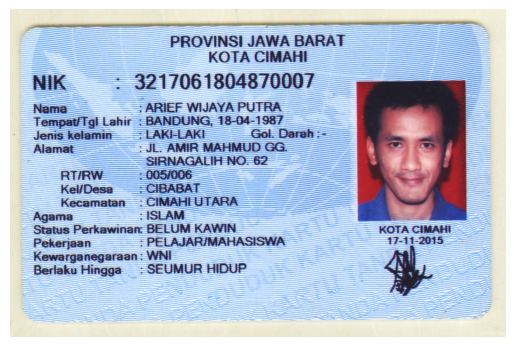

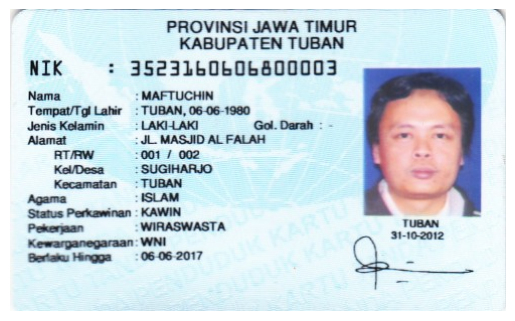

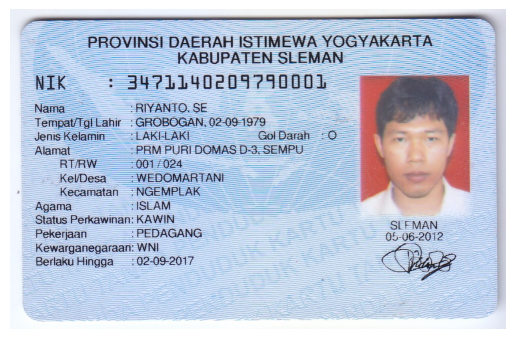

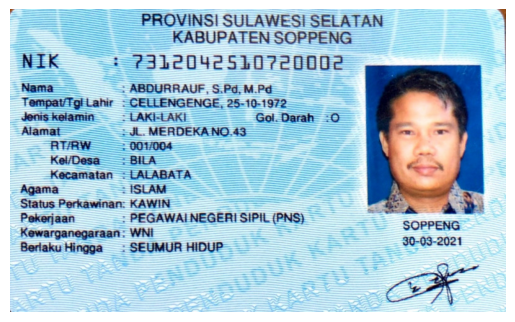

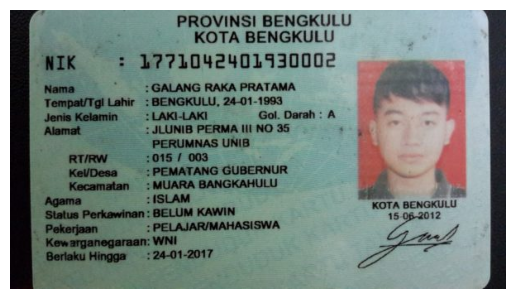

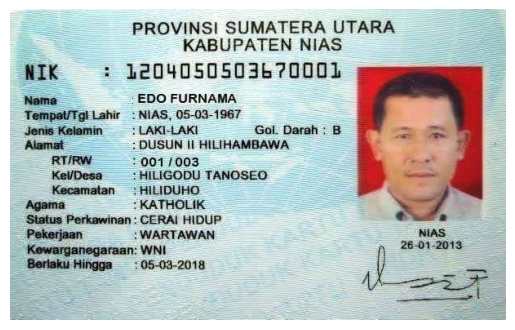

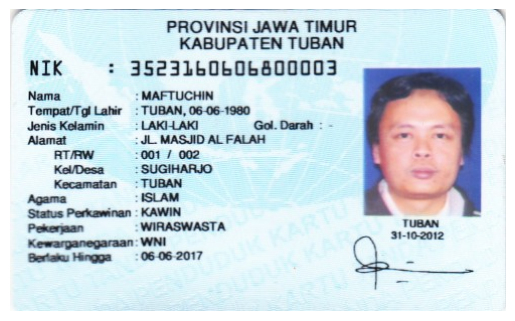

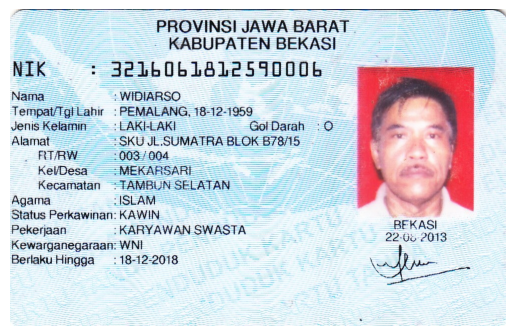

In [25]:
ktp = '/content/drive/MyDrive/Colab Notebooks/PCVK/img/KTP'

# Mengambil File dari variabel ktp
image_files = [file for file in os.listdir(ktp) if file.endswith((".jpg", ".jpeg", ".png"))]

# Loop melalui semua gambar dalam direktori
for img_file in image_files:
    img_path = os.path.join(ktp, img_file)

    img = cv2.imread(img_path)

    # Tampilkan gambar
    plt.figure()
    plt.axis('off')
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

**Membuat Threshold**

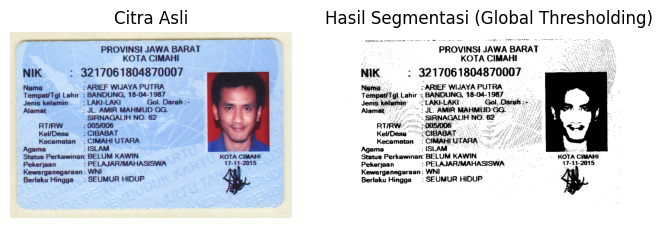

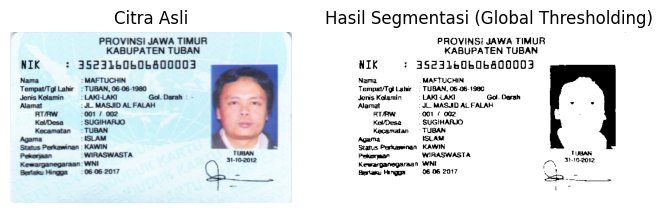

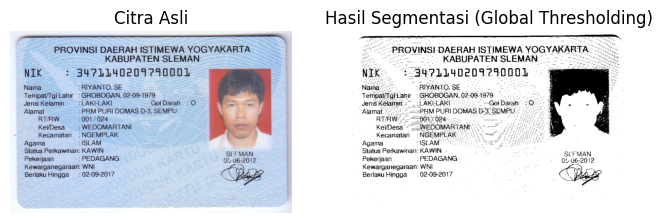

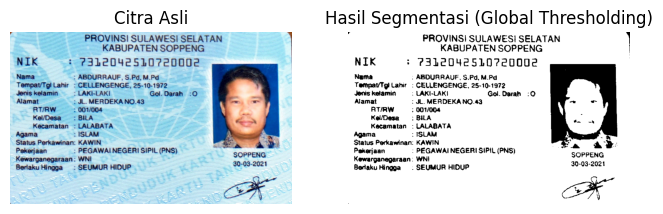

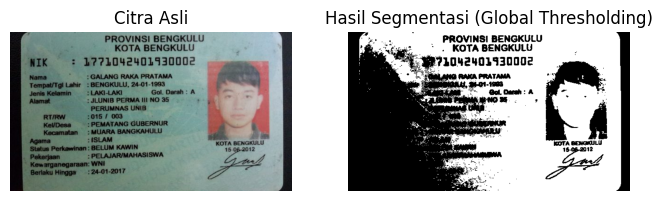

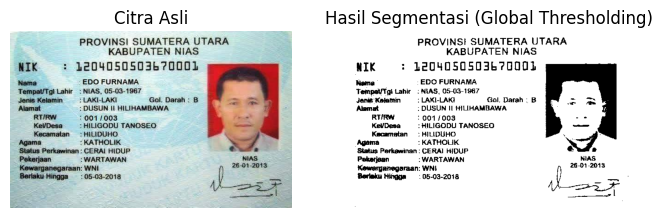

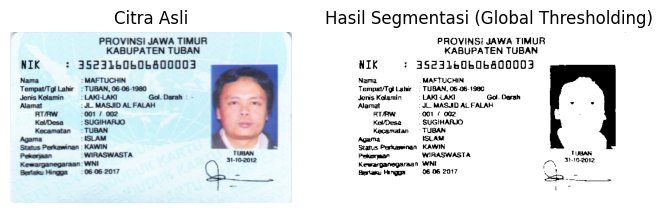

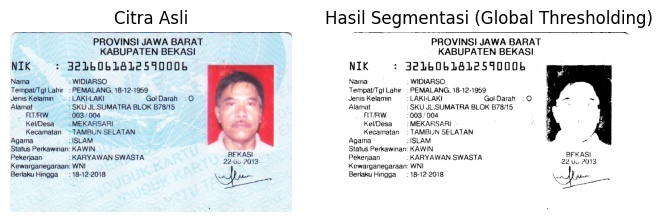

In [26]:
# Loop melalui semua gambar dalam direktori
for img_file in image_files:
    img_path = os.path.join(ktp, img_file)

    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Melakukan global thresholding
    ret, thresholded = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

    # Menampilkan gambar asli dan hasil segmentasi
    plt.figure(figsize=(8, 4))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('Citra Asli')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(thresholded, cmap='gray')
    plt.title('Hasil Segmentasi (Global Thresholding)')
    plt.axis('off')

    plt.show()